<a href="https://colab.research.google.com/github/nk755799/IDS/blob/main/HW5/HW5_project2_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project5  (HW5)

Naresh Kalluri (10755799)

Github repository:https://github.com/nk755799/IDS/tree/main/HW5

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing


**Imported the Dataset from my Github (HW5) Repository**

In [ ]:
wineFlagDF = pd.read_csv("https://raw.githubusercontent.com/nk755799/IDS/main/HW5/wine_flag_all.csv")
wineFlagDF.head()

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low


**Test for presence any missing attribute/target values and impute as necessary.** 

Finding is there any null values in the dataset

In [ ]:
#Checking whether the dataset has any null value
wineFlagDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

Hence from the above we seen that there is no missing/null values in the dataset.

**Encode all categoric attributes.**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# saving the encoding dataframe here
encoded_wineFlagDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineFlagDF.shape[1]):
    if wineFlagDF.dtypes[i]=='object' or wineFlagDF.dtypes[i]=='bool':
        encoded_wineFlagDF[wineFlagDF.columns[i]] = le.fit_transform(wineFlagDF[wineFlagDF.columns[i]])



print("-=========================")
print(wineFlagDF)
print("-=========================")
encoded_wineFlagDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


 **Create contingency tables (cross tabulations) for:      
a. Type vs. alcohol content     
b. Type vs. Sugar content**

In [ ]:
crossTab1 = pd.crosstab(wineFlagDF.Type,wineFlagDF.Sugar_flag)
crossTab1

Sugar_flag,High,Low
Type,,
Red,237,848
White,1382,878


In [ ]:
crossTab2 = pd.crosstab(wineFlagDF.Type, wineFlagDF.Alcohol_flag)
crossTab2

Alcohol_flag,High,Low
Type,,
Red,485,600
White,1176,1084


**Plot the two cross tabulations obtained in Step 5**      
plotting the two cross validation got in step5.

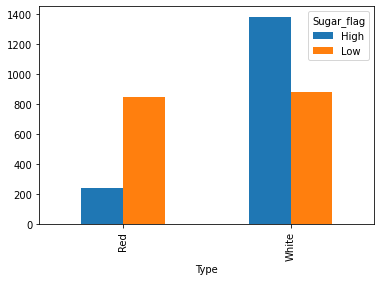

In [ ]:
crossTab1.plot.bar()


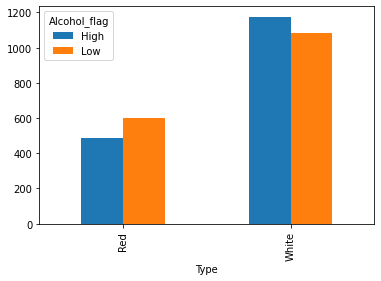

In [ ]:
crossTab2.plot.bar()

7.

In [ ]:
# probability for type Red and White

p_red=(1085/3345)
p_white=(2260/3345)

print("P(red)=",p_red)
print("P(White)=",p_white)

P(red)= 0.3243647234678625
P(White)= 0.6756352765321375


In [ ]:
# probability for high and low Alcohol 

p_low_alcohol=(1684/3345)
p_high_alcohol=(1661/3345)

print("P(low_alcohol)=",p_low_alcohol)
print("P(high_alcohol)=",p_high_alcohol)

P(low_alcohol)= 0.5034379671150971
P(high_alcohol)= 0.49656203288490286


In [ ]:
# c. The probability of high and low sugar content.

p_low_sugar=(1726/3345)
p_high_sugar=(1619/3345)

print("P(low_sugar)=",p_low_sugar)
print("P(high_sugar)=",p_high_sugar)

P(low_sugar)= 0.5159940209267564
P(high_sugar)= 0.48400597907324366


In [ ]:
# The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).

p_alcohol_high_red=((485/1661)*(1661/3345))/(1085/3345)
print("p(high_alcohol_red)=",p_alcohol_high_red)

# The conditional probabilities p(Alcohol_flag = Low ∣ Type = Red).

p_alcohol_low_red=((600/1684)*(1684/3345))/(1085/3345)
print("p(low_alcohol_red)=",p_alcohol_low_red)

p(high_alcohol_red)= 0.44700460829493094
p(low_alcohol_red)= 0.5529953917050691


In [ ]:
#The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

p_sugar_high_red=((237/1619)*(1619/3345))/(1085/3345)
print("p(high_Sugar_red)=",p_sugar_high_red)

#The conditional probabilities p(Sugar_flag = Low ∣ Type = Red).

p_sugar_low_red=((848/1726)*(1726/3345))/(1085/3345)
print("p(low_Sugar_red)=",p_sugar_low_red)

p(high_Sugar_red)= 0.21843317972350232
p(low_Sugar_red)= 0.7815668202764977


**Create NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.** 

Creating NB Classifiers and recirding their accuracy on various training given by above ratios.

In [ ]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineFlagDF.iloc[:,1:3]
y = encoded_wineFlagDF.iloc[:,0:1]

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2, stratify=y)

# Display the sets
print(X_train)
print(X_test)


      Alcohol_flag  Sugar_flag
2688             0           1
1824             1           0
2483             0           0
935              1           1
2017             1           0
...            ...         ...
2650             0           1
2246             1           1
3001             0           1
11               1           1
2854             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
288              0           1
3047             0           1
2197             1           1
3132             0           0
682              1           0
...            ...         ...
864              0           1
2505             0           0
232              1           1
2467             0           0
2634             0           0

[669 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


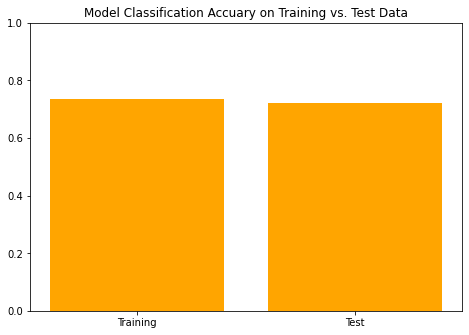

In [ ]:
# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]

scores1 = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores1, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1184             1           0
2433             1           0
2765             0           1
2217             1           1
1555             0           0
...            ...         ...
2017             1           0
3106             0           1
2428             1           0
11               1           1
2343             1           1

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2253             1           0
2797             0           0
1005             1           1
3264             0           0
463              1           1
...            ...         ...
540              0           0
855              0           1
1862             1           0
1619             1           0
1719             1           0

[837 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


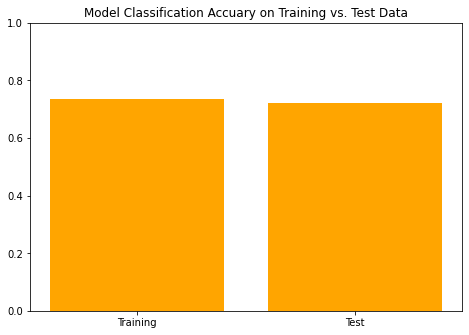

In [ ]:
# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores2 = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores2, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
print(X_train)
print(X_test)


      Alcohol_flag  Sugar_flag
1768             1           0
1792             1           1
413              1           0
1610             1           0
1671             1           0
...            ...         ...
522              1           0
893              1           0
1924             1           1
11               1           1
1868             1           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1389             0           0
1899             1           0
162              1           1
1889             1           0
2982             0           0
...            ...         ...
941              0           0
3223             0           0
3219             0           1
2221             1           0
205              0           0

[1004 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


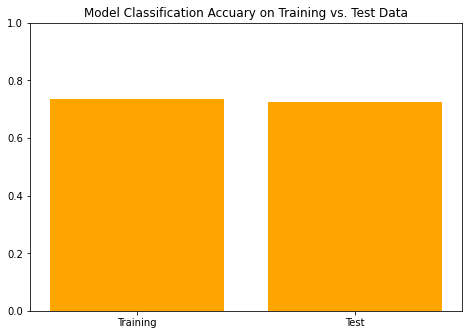

In [ ]:
# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores3 = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores3, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
3188             0           1
1192             1           0
1152             1           1
1741             1           0
1308             1           1
...            ...         ...
3203             0           1
1129             1           1
11               1           1
2226             1           0
2437             0           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1326             0           1
520              1           1
443              0           1
1721             1           1
2826             0           1
...            ...         ...
744              1           0
3184             0           1
1430             0           1
2986             0           0
1062             1           1

[1338 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


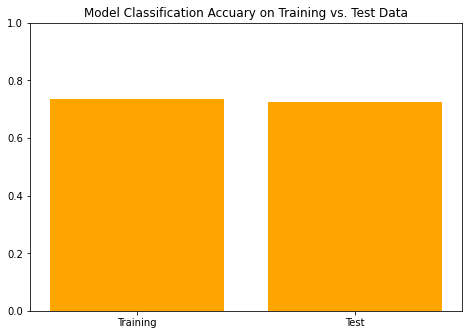

In [ ]:

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores4 = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores4, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1097             1           1
3003             0           0
1341             0           0
1685             1           0
708              0           0
...            ...         ...
1803             1           1
3297             0           0
1129             1           1
580              0           1
770              1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
348              0           1
1435             0           0
1475             0           0
3212             0           0
1269             1           1
...            ...         ...
2899             0           1
2773             0           1
2584             0           0
1219             1           1
621              0           0

[1673 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


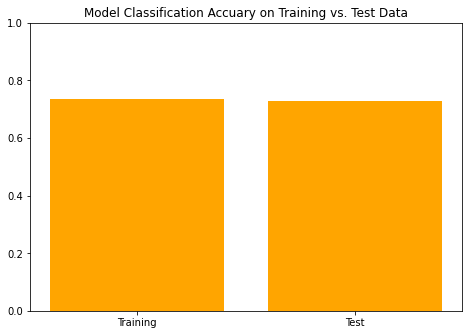

In [ ]:

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores5 = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores5, color="orange")
ax.set_ylim(0, 1)
plt.show()

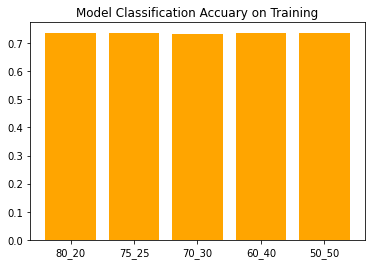

In [ ]:
# Plot the accuracy claues
labels = ["80_20", "75_25", "70_30", "60_40", "50_50"]
scores = [scores1[0] , scores2[0],scores3[0], scores4[0], scores5[0]]
plt.title('Model Classification Accuary on Training')
plt.bar(x=labels, height=scores, color="orange")
plt.show()

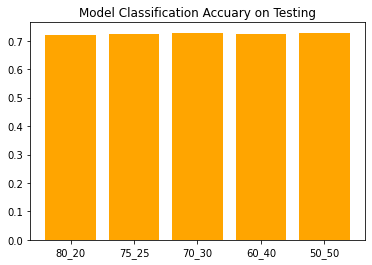

In [ ]:
# Plot the accuracy claues
labels = ["80_20", "75_25", "70_30", "60_40", "50_50"]
scores = [scores1[1] , scores2[1],scores3[1], scores4[1], scores5[1]]
plt.title('Model Classification Accuary on Testing')
plt.bar(x=labels, height=scores, color="orange")
plt.show()

**Summary of my Findings:**

**1.By checking the null values it shows that there are no null values   
2.Encoded all categorical attributes   
3.Created contigency tables for type vs alocohol content and type vs Sugar content.   
4.Plotted the two cross tabulations.   
5.found the probabilities**